In [1]:
# Setup
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\Ciara Woellhof\BME 574 - Julia`


In [2]:
Pkg.add(["Random","LinearAlgebra","FFTW","Plots"])

    Updating registry at `C:\Users\Ciara Woellhof\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\Ciara Woellhof\BME 574 - Julia\Project.toml`
  [7a1cc6ca] + FFTW v1.8.0
  No Changes to `C:\Users\Ciara Woellhof\BME 574 - Julia\Manifest.toml`


In [3]:
using FFTW, Random, Plots

In [4]:
dt = .001
t = 0:dt:1

0.0:0.001:1.0

In [5]:
f = sin.(2*pi*50*t) + sin.(2*pi*120*t)

1001-element Vector{Float64}:
  0.0
  0.993564100303636
  1.5858119807207447
  1.579530237150737
  1.0763897498594581
  0.4122147477075273
 -0.031230734433534857
 -0.03531093112706807
  0.3390953651276179
  0.7907706684766624
  0.9510565162951533
  0.5958100580910728
 -0.21966069960779344
  ⋮
 -0.5958100580910733
 -0.951056516295206
 -0.7907706684767422
 -0.3390953651276587
  0.03531093112701389
  0.031230734433545737
 -0.412214747707486
 -1.0763897498593344
 -1.5795302371506912
 -1.585811980720726
 -0.9935641003037132
 -8.427055531661601e-14

In [6]:
noise_f = f + 2.5*randn(length(t))

1001-element Vector{Float64}:
 -1.6568965541765865
  3.002987208584983
  2.5004204911668593
  2.2720064949308254
  4.55379483722888
  0.8827396013977247
  3.3912874615228126
 -2.7591513415836344
  0.9115940090571406
 -2.9022354293034356
  4.8186903877608165
 -0.7900528792062513
  3.239944542727664
  ⋮
 -4.172497363059328
  2.248373103081322
 -5.217906344983138
 -0.7795278357089196
 -0.6656938931545525
  1.12517502048148
  1.2643550201585803
 -2.6436167529971377
  2.880941111086578
  1.2107960574206689
 -3.2033560869895474
 -0.9421617791261029

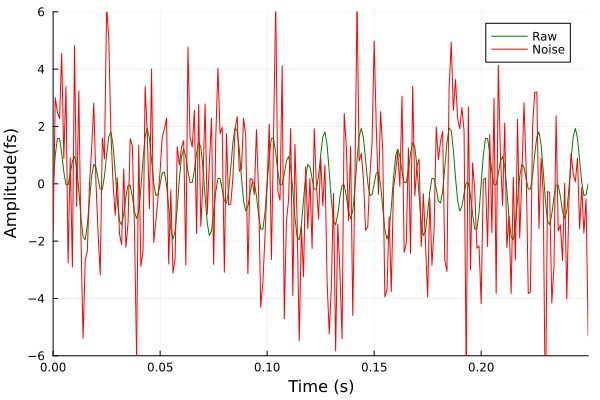

In [11]:
plot(t, f, label = "Raw", color = :green, xlabel = "Time (s)", ylabel = "Amplitude(fs)", xlim = (0,.25), ylim =  (-6,6)) 
plot!(t, noise_f, label = "Noise", color = :red)

In [15]:
# FFT
fastFT = fft(noise_f)
# Power density spectrum
PSD = abs.(fastFT.*conj.(fastFT/(length(t))))
# Y freq
freq = (0:(length(t))-1)/(dt*(length(t)))
l = length(t)

1001

In [16]:
# De-noise
L =1:div(l,2) 
indicies = PSD.>100 
PSDclean = PSD.*indicies

1001-element Vector{Float64}:
  0.7208119957309955
  1.4403401126115913
  1.6419248714802124
  1.317647127768637
  0.7086851962070104
  0.1684079557319858
 -0.03114395892315842
  0.15553908308573278
  0.5289149020371321
  0.7619749411634438
  0.5893780012699329
 -0.03538810627052195
 -0.9011754359103498
  ⋮
 -0.3643917287058439
 -0.8918816776777313
 -0.9330772659197301
 -0.6054544184687813
 -0.21274474453177805
 -0.06825109440334372
 -0.315489894858348
 -0.844160841552568
 -1.3475306351076457
 -1.4904082650236357
 -1.0966342399719793
 -0.2540462520520624

In [18]:
fastFT_filtered= fastFT.*indicies 
fast_filtered = real(ifft(fastFT_filtered)) 

1001-element Vector{Float64}:
  0.7208119957309955
  1.4403401126115913
  1.6419248714802124
  1.317647127768637
  0.7086851962070104
  0.1684079557319858
 -0.03114395892315842
  0.15553908308573278
  0.5289149020371321
  0.7619749411634438
  0.5893780012699329
 -0.03538810627052195
 -0.9011754359103498
  ⋮
 -0.3643917287058439
 -0.8918816776777313
 -0.9330772659197301
 -0.6054544184687813
 -0.21274474453177805
 -0.06825109440334372
 -0.315489894858348
 -0.844160841552568
 -1.3475306351076457
 -1.4904082650236357
 -1.0966342399719793
 -0.2540462520520624

In [20]:
fft2_filtered = fft(fast_filtered)  
PSD_filtered = abs.(fft2_filtered .* conj.(fft2_filtered)) / (length(t))  

1001-element Vector{Float64}:
 3.8421872495448484e-32
 3.3172797755569346e-33
 2.231847971825421e-31
 3.841139254510348e-32
 4.408235838965462e-32
 2.3577358669682395e-32
 2.2511253495940584e-32
 5.6034145222817946e-33
 1.9580822712654704e-31
 1.0024977293632296e-32
 3.3313653637591774e-32
 5.32937637572842e-32
 2.3487611663450447e-32
 ⋮
 2.348761166345044e-32
 1.8003813708005677e-32
 1.446618872320134e-31
 1.0024977293632286e-32
 1.95808227126547e-31
 5.6034145222817967e-33
 2.2511253495940584e-32
 2.357735866968238e-32
 4.408235838965462e-32
 6.447684149067053e-32
 7.706984196217687e-33
 3.3172797755569305e-33

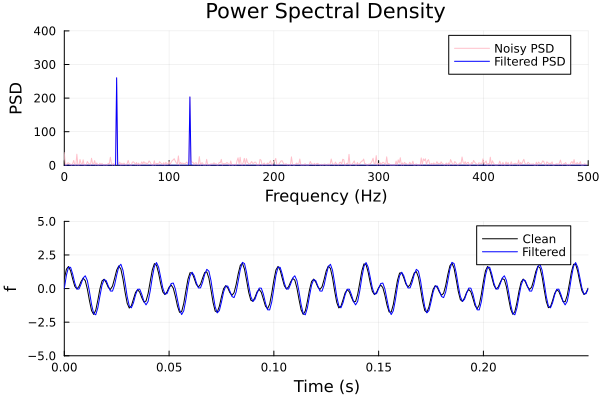

In [31]:
p1 = plot(freq[L], PSD[L], label = "Noisy PSD", color = :pink, xlabel = "Frequency (Hz)", ylabel = "PSD", ylim = (0, 400), xlim = (0, 500))
plot!(freq[L], PSD_filtered[L], label = "Filtered PSD",color = :blue, title = "Power Spectral Density")

 #plot both the clean and denoised signal
p2 = plot(t, fast_filtered, label = "Cleaned", color = :black, xlabel = "Time (s)", ylabel = "f", xlim = (0,0.25), ylim =  (-5,5))
plot!(t, f, label = "Filtered", color = :blue)

# plot
plot(p1,p2, layout = (2,1))
